In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/multi_attribution_sample.csv')
df.head()

,Global Flag,Major Flag,SMC Flag,Commercial Flag,IT Spend,Employee Count,PC Count,Size,Tech Support,Discount,Revenue
0,1,0,1,0,45537,26,26,152205,0,1,17688.36300
1,0,0,1,1,20842,107,70,159038,0,1,14981.43559
2,0,0,0,1,82171,10,7,264935,1,1,32917.13894
3,0,0,0,0,30288,40,39,77522,1,1,14773.76855
4,0,0,1,0,25930,37,43,91446,1,1,17098.69823


In [3]:
df.groupby('Discount').describe()['Revenue']

,count,mean,std,min,25%,50%,75%,max
Discount,,,,,,,,
0,979.0,10605.725828,6149.449791,-616.572451,5896.311465,9581.700883,14355.80144,40166.67407
1,1021.0,19992.976747,13054.139596,889.975653,10193.080590,16998.388560,26795.14017,86006.92445


## Histograma

In [4]:
def hist_plot(col):
    g = sns.FacetGrid(df, col='Discount')
    g = (g.map(sns.histplot, col))
    return g

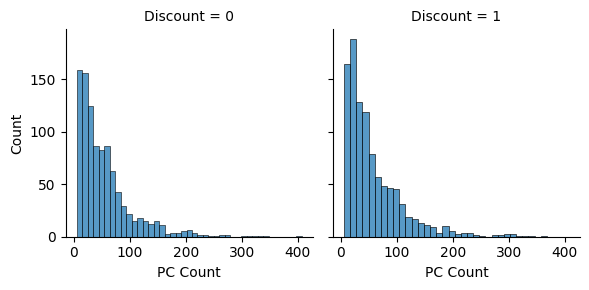

In [5]:

hist_plot('PC Count')

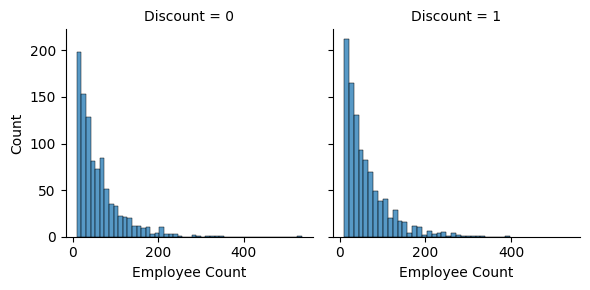

In [6]:
hist_plot('Employee Count')

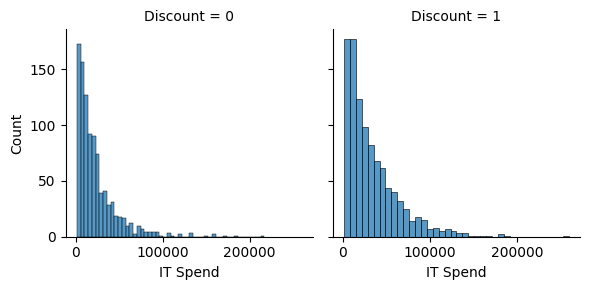

In [7]:
hist_plot('IT Spend')

## Scatter Plot

<Axes: xlabel='IT Spend', ylabel='Revenue'>

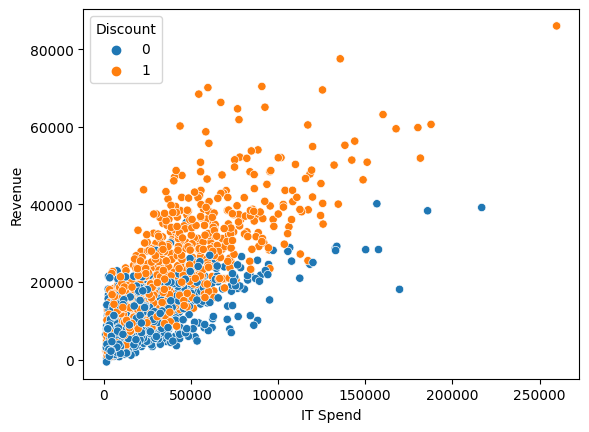

In [8]:
sns.scatterplot(df, x='IT Spend', y='Revenue', hue='Discount')

<Axes: xlabel='Employee Count', ylabel='Revenue'>

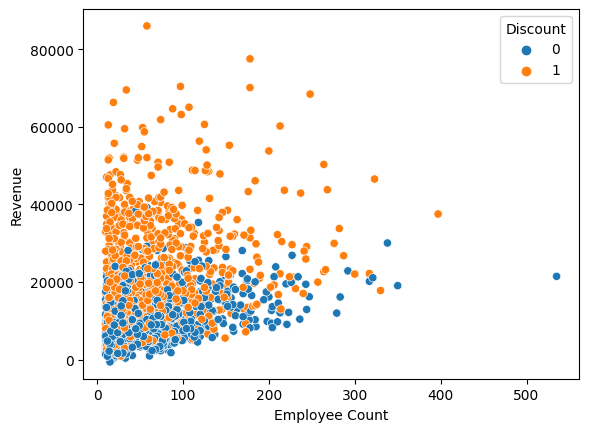

In [9]:
sns.scatterplot(df, x='Employee Count', y='Revenue', hue='Discount')

<Axes: xlabel='Size', ylabel='Revenue'>

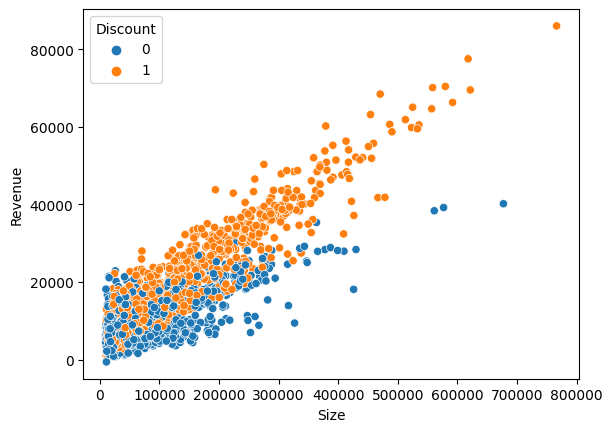

In [10]:
sns.scatterplot(df, x='Size', y='Revenue', hue='Discount')

## Intervalo de confiança

In [15]:
with_discount = df[df['Discount'] == 1]['Revenue']
without_discount = df[df['Discount'] == 0]['Revenue']
def se(y: pd.Series):
    return y.std() / np.sqrt(len(y))


print("SE for Companies with discount:", se(with_discount))
print("SE for Companies without discount:", se(without_discount))

SE for Companies with discount: 408.5407497008286
SE for Companies without discount: 196.53726768002144


In [16]:
def ci(y: pd.Series):
    return (y.mean() - 2 * se(y), y.mean() + 2 * se(y))

print("95% for Companies with discount:", ci(with_discount))
print("95% for Companies without discount:", ci(without_discount))

95% for Companies with discount: (19175.89524711137, 20810.058245914686)
95% for Companies without discount: (10212.651292255177, 10998.800362975264)
